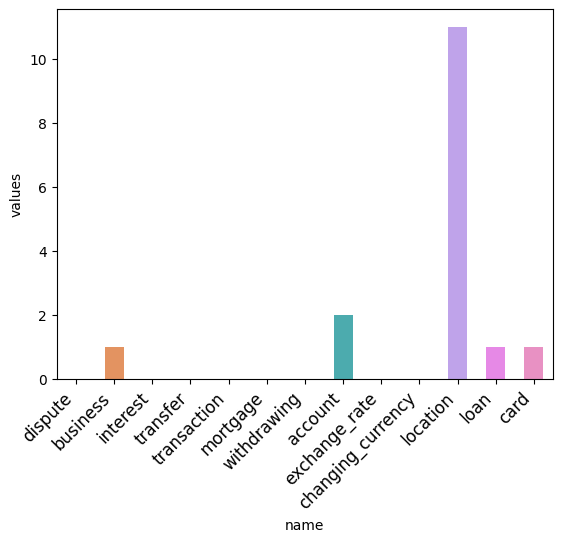

['welcome to biat bot sana123 if  you need to know the commandes  send "help" ', 'Hi there! How may I assist you?', 'here to assist ', 'press the name of the card you want to know about ', 'sure, tell us your location', 'The closest Biat branch to your location is BIAT at PQQ3+PJJ, Sfax. The estimated distance is 0.58 km.', " to open a business account, you will need to provide certain documents such as your business registration and tax ID number,as well as proof of identification for the authorized signers on the account. Some banks may also require additional documentation,such as a business plan or financial statements.  It's best to check with the financial institution where you plan to open the account directly to confirm their specific requirements", 'Greetings! What can I do for you?', "To open a new account, you can visit one of our branches or use the remote account opening service which allows you to open the account(s) of your    choice without leaving your home and in a fe

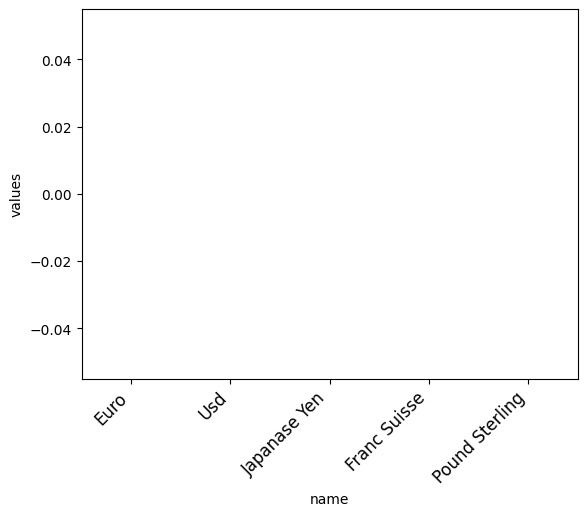

                  name  values
0  Carte Technologique       0
1      Carte classique       0
2           Carte CASH       0
3            Carte FLY       0
4         Carte CHABEB       0
no data found


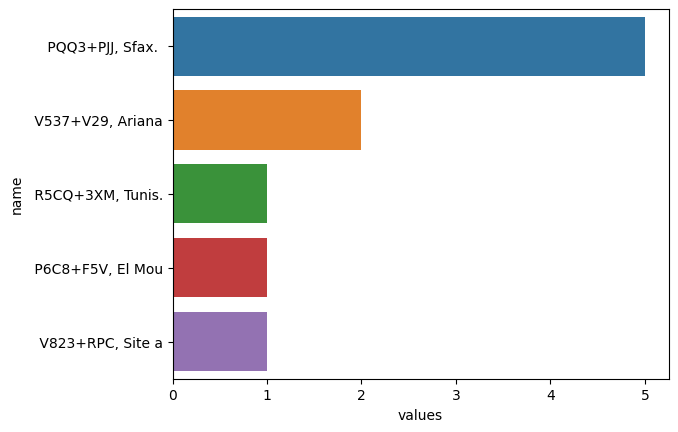

User ID: sana123, Messages: [[{'msg': 'welcome to biat bot sana123 if  you need to know the commandes  send "help" ', 'from': 'bot'}, {'msg': 'Hi', 'from': 'user'}, {'msg': 'Hi there! How may I assist you?', 'from': 'bot'}, {'msg': 'Help', 'from': 'user'}, {'msg': 'here to assist ', 'from': 'bot'}, {'msg': 'show me card', 'from': 'user'}, {'msg': 'press the name of the card you want to know about ', 'from': 'bot'}, {'msg': 'branch in my zone', 'from': 'user'}, {'msg': 'sure, tell us your location', 'from': 'bot'}, {'msg': 'Sfax', 'from': 'user'}, {'msg': 'The closest Biat branch to your location is BIAT at PQQ3+PJJ, Sfax. The estimated distance is 0.58 km.', 'from': 'bot'}, {'msg': 'What are the requirements for opening a business account', 'from': 'user'}, {'msg': " to open a business account, you will need to provide certain documents such as your business registration and tax ID number,as well as proof of identification for the authorized signers on the account. Some banks may also 

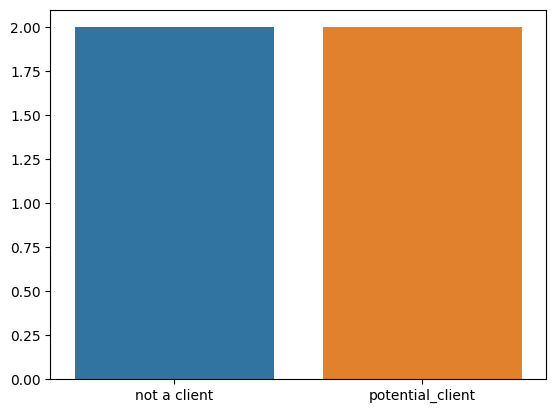

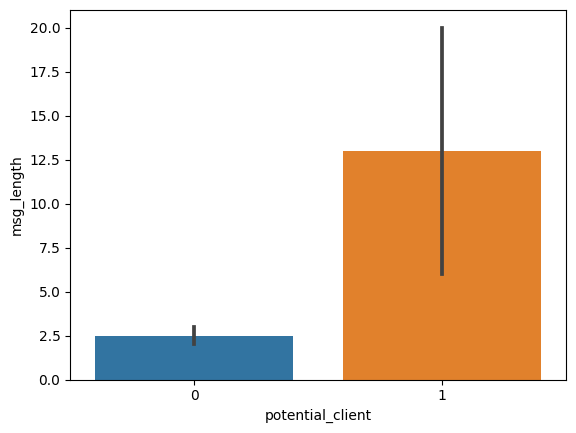

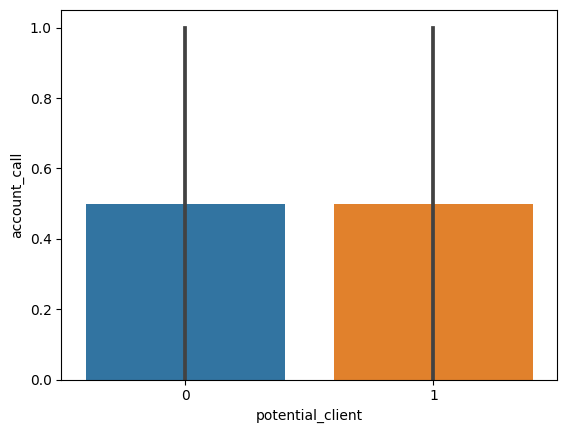

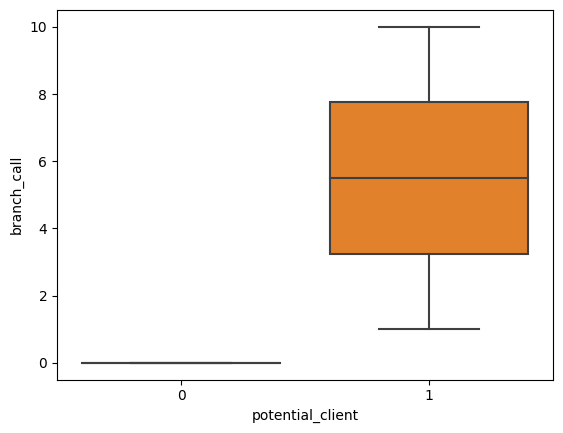

In [1]:
import boto3
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import os
os.environ['VOILA_HEARTBEAT_RATE'] = '-1'



# In[294]:


dynamodb = boto3.client('dynamodb', region_name='us-east-1')
table_name = 'discussion_table'
column_name = 'message'

# Define the ProjectionExpression to retrieve only the specified column
projection_expression = f"{column_name}"

# Perform a Scan operation to extract the column from multiple items
response = dynamodb.scan(
    TableName=table_name,
    ProjectionExpression=projection_expression
)

# Extract the column from each item in the response
column_values = [item[column_name] for item in response['Items']]


# In[295]:





# In[296]:


msg_values = [item['M']['msg']['S'] for sublist in  column_values for item in sublist['L'] if item['M']['from']['S'] == 'user']



# In[297]:


dispute=0
business=0
interest=0
transfer=0
loan=0
transaction=0
mortgage=0
withdrawing=0
account=0
exchange_rate=0
changing_currency=0
location=0
card=0
msg_values=[x.lower() for x in msg_values]
for i in msg_values:
    if 'dispute' in i.lower():
        dispute+=1
    if 'business' in i.lower():
        business+=1
    if 'interest' in i.lower():
        interest+=1
    if 'transfer' in i.lower():
        transfer+=1
    if 'transaction' in i.lower():
        transaction+=1
    if 'mortgage' in i.lower():
        mortgage+=1
    if 'withdrawing' in i.lower():
        withdrawing+=1
    if 'account' in i.lower():
        account+=1
    if 'exchange_rate' in i.lower():
        exchange_rate+=1
    if 'change' in i.lower():
        changing_currency+=1
    if 'branch'  in i.lower():
        location+=1
    if 'loan' in i.lower():
        loan+=1
    if 'card' in i.lower():
        card+=1
    


# In[298]:


columns=['name','values']
data=[['dispute',dispute],['business',business],['interest',interest],['transfer',transfer],['transaction',transaction],['mortgage',mortgage],['withdrawing',withdrawing],
      ['account',account],['exchange_rate',exchange_rate],['changing_currency',changing_currency],['location',location],['loan',loan],['card',card]]
df = pd.DataFrame(data,columns=columns)



# In[299]:


ax=sns.barplot(x="name", y="values", data=df,width=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.xticks(fontsize=12)
plt.show()


# In[300]:


msg_values_bot = [item['M']['msg']['S'] for sublist in  column_values for item in sublist['L'] if item['M']['from']['S'] == 'bot']



# In[301]:


Euro=0
Usd=0
JapanaseYen=0
FrancSuisse=0
PoundSterling=0

for i in msg_values_bot:
    if 'EUR' in i:
        Euro+=1
    if 'USD' in i:
        Usd+=1
    if 'JPY' in i:
        JapanaseYen+=1
    if 'CHF' in i:
        FrancSuisse+=1
    if 'GBP' in i:
        PoundSterling+=1

columns=['name','values']
data=[['Euro',Euro],['Usd',Usd],['Japanase Yen',JapanaseYen],['Franc Suisse',FrancSuisse],['Pound Sterling',PoundSterling]]
df_currency = pd.DataFrame(data,columns=columns)

    


# In[302]:


ax=sns.barplot(x="name", y="values", data=df_currency,width=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.xticks(fontsize=12)
plt.show()


# In[303]:


msg_values = [item['M']['msg']['S'] for sublist in  column_values for item in sublist['L'] if item['M']['from']['S'] == 'user']
CarteTechnologique=0
CarteClassique=0
CarteCash=0
CarteFLY=0
CarteCHABEB=0


for i in msg_values:
    if 'Carte Technologique' in i:
        CarteTechnologique+=1
    if 'Carte VISA ou MasterCard classique' in i:
        CarteClassique+=1
    if 'Carte CASH' in i:
        CarteCash+=1
    if 'Carte FLY' in i:
        CarteFLY+=1
    if 'Carte CHABEB' in i:
        CarteCHABEB+=1


columns_=['name','values']
data_=[['Carte Technologique',CarteTechnologique],['Carte classique',CarteClassique],['Carte CASH',CarteCash],['Carte FLY',CarteFLY],['Carte CHABEB',CarteCHABEB]]
df_card = pd.DataFrame(data_,columns=columns_)




# In[304]:


CarteTechnologique=(CarteTechnologique/5)*100
CarteClassique=(CarteClassique/5)*100
CarteCash=(CarteCash/5)*100
CarteFLY=(CarteFLY/5)*100
CarteCHABEB=(CarteCHABEB/5)*100
if CarteTechnologique+CarteClassique+CarteCash+CarteFLY+CarteCHABEB==0:
    print('no data found')
else:


    labels = ['Carte Technologique', 'Carte classique', 'Carte CASH', 'Carte FLY', 'Carte CHABEB']
    sizes = [CarteTechnologique,CarteClassique,CarteCash,CarteFLY,CarteCHABEB]

    # create pie chart
    plt.figure(figsize=(6,6))
    sns.set_style("whitegrid")
    plt.pie(sizes, labels=None, autopct='%1.1f%%', startangle=90)

    # add title and legend
    plt.title('clicked card')
    plt.legend(labels,loc='upper left', bbox_to_anchor=(1,1))
    plt.show()


# In[305]:


list_location=[x for x in msg_values_bot if  'The closest Biat' in x ]
list_location_final=[]
location_dict={}
location_numbers=[]
for i in list_location:
    i.replace('The closest Biat branch to your location is BIAT at','')
    i.replace('The closest Biat branch to your location is Biat at','')
    i.replace('. The estimated distance is 0.58 km','')
    list_location_final.append(i.replace('The closest Biat branch to your location is BIAT at','').replace('The closest Biat branch to your location is Biat at','')[0:17])
for i in list_location_final:
   location_dict.update({i: i})
for i in location_dict:
    j=0
    for a in list_location_final:
        if i==a:
            j=j+1
    location_numbers.append(j)



# In[306]:


location_final=[]
i=0
for location in location_dict:
    location_final.append([location,location_numbers[i]])
    i=i+1
location_final
if len(location_final)>5:
    location_final=location_final[0:5]


# In[307]:


columns_=['value','location_name']
df_location= pd.DataFrame(location_final,columns=columns)
df_location.sort_values(axis=0,by=['values'],inplace=True,ascending=False)



# In[308]:


ax=sns.barplot( x='values',y= 'name',data=df_location )


plt.show()


# In[309]:


dynamodb = boto3.resource('dynamodb',region_name='us-east-1')
table = dynamodb.Table('discussion_table')

# Perform the scan to retrieve all items in the table
response = table.scan()

# Initialize an empty dictionary to store the data for every user
data_by_user = {}

# Iterate over the items in the response and group them by user ID
for item in response['Items']:
    user_id = item['user_name']
    if user_id not in data_by_user:
        data_by_user[user_id] = []
    data_by_user[user_id].append(item['message'])

list_user=[]
list_msg=[]
list_msg_extracted=[]
list_msg_values=[]

        
# Print the data for every user
for user_id, messages in data_by_user.items():
    print(f"User ID: {user_id}, Messages: {messages}")
    list_user.append(user_id)
    list_msg.append(messages)

for i in list_msg:
    for j in i:
        list_msg_extracted.append(j)
for i in list_msg_extracted:
    list_msg_values.append([item['msg'] for item in i if item['from']=='user'])



# In[310]:


msg_length=[]
for i in list_msg_values:
    msg_length.append(len(i))
msg_length
columns_=['name','msg_length']
data_=[]
for i in range(len(list_user)):
    data_.append([list_user[i],msg_length[i]])


df_user = pd.DataFrame(data_,columns=columns_)



# In[311]:


account_call=[]
branch_call=[]
loan_call=[]
card_call=[]
withdrawing_call=[]
business_call=[]
dispute_call=[]

for i in list_msg_values:
    account_user=0
    branch_user=0
    loan_user=0
    card_user=0
    withdrawing_user=0
    business_user=0
    dispute_user=0
    for sentences in i:
        if 'account' in sentences.lower():
            account_user+=1
        if 'branch' in sentences.lower():
           branch_user+=1
        if 'loan' in sentences.lower():
            loan_user+=1
        if 'card' in sentences.lower():
            card_user+=1  
        if 'withdrawing' in sentences.lower():
            withdrawing_user+=1
        if 'business' in sentences.lower():
            business_user+=1
        if 'dispute' in sentences.lower():
            dispute_user+=1
        
        

    branch_call.append(branch_user)
    account_call.append(account_user)
    loan_call.append(loan_user)
    card_call.append(card_user)
    withdrawing_call.append(withdrawing_user)
    business_call.append(business_user)
    dispute_call.append(dispute_user)

df_user['account_call']=account_call
df_user['branch_call']=branch_call
df_user['loan_call']=loan_call
df_user['card_call']=card_call
df_user['withdrawing_cal']=withdrawing_call
df_user['business_call']=business_call
df_user['dispute_call']=dispute_call




df_user_=df_user.iloc[:,1:]


        


# In[312]:


client_data=pd.read_excel('train_client.xlsx')
x_data=client_data.iloc[:,:-1].iloc[:,1:]

y_data=client_data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split( x_data,y_data  ,test_size=0.2, random_state=42)


X_train.head()


# In[313]:


model=LogisticRegression(penalty='l2' ,max_iter=200,C=0.25)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)



# In[314]:


client =model.predict(df_user_)
df_user['potential_client']=client



# In[315]:


client_=[x for x in client]
counts = [client_.count(0), client_.count(1)]
ax=sns.barplot( x=['not a client','potential_client'] ,y= counts )

plt.show()


# In[316]:


ax=sns.barplot( x='potential_client' ,y='msg_length' ,data=df_user )

plt.show()


# In[317]:


ax=sns.barplot( x='potential_client' ,y='account_call' ,data=df_user )

plt.show()


# In[318]:


ax=sns.boxplot( x='potential_client' ,y='branch_call' ,data=df_user )

